## Métodos de Otimização: Métodos de procura multidimensional

### Método de Quasi-Newton (BFGS) - Diferenças finitas

__Imports:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time
name = 'Quasi-Newton (BFGS)' 
Start = time.time()

__Função Avaliada:__

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

__Método:__

In [3]:
def grad(x,countFunc):
    epsilon = 1.e-10
    nFunc = 34; Qvar = 12
    
    for i in range(0,len(x)):
        xtmp=x.copy()
        xtmp[i]=xtmp[i]+epsilon
        F_xtmp, countFunc = f(xtmp,nFunc,Qvar,countFunc)
        F_x, countFunc = f(x,nFunc,Qvar,countFunc)
        G[i]=(F_xtmp-F_x)/epsilon
    
    return G,countFunc

In [4]:
nFunc = 34; Qvar = 12; countFunc = 0

Hinv=np.zeros((Qvar,Qvar), dtype='float')
G=np.zeros(Qvar, dtype='float')
Gold=np.zeros(Qvar, dtype='float')
xnew=np.zeros(Qvar, dtype='float')
xold=np.zeros(Qvar, dtype='float')
layout = "{0:.5f}"
tol = -1e-10
fHist = []

#chute incial:
xold[0] = -36
xold[1] = -45
xold[2] = -50
xold[3] = -55
xold[4] = -59
xold[5] = -62
xold[6] = -65
xold[7] = -68
xold[8] = -70
xold[9] = -73
xold[10] = -75
xold[11] = -77

alpha=0.1; kmax=50; k=0
F0,countFunc = f(xold,nFunc,Qvar,countFunc)

for i in range(0, Qvar):
    print(layout.format(xold[i]), end =" ")
print(layout.format(F0))
    
# Primeira iteração k=0

# Calculo Gradiente
G,countFunc = grad(xold,countFunc)

# Aproximação da inversa do Hessiano (Newton)
for i in range(0, Qvar):
    Hinv[i,i]=1.

#Calculo da direção
d = -np.matmul(Hinv,G)

# Processo iterativo
xnew=xold+alpha*d

#Atualiza xold
xold = xnew.copy()

#Calculo da função
F,countFunc = f(xnew,nFunc,Qvar,countFunc)
for i in range(0, Qvar):
    print(layout.format(xnew[i]), end =" ")
print(layout.format(F))
fHist.append(F)

while k < kmax:
    k += 1
    
    Gold = G.copy()
    # Calculo Gradiente
    G,countFunc = grad(xold,countFunc)

    #Calculo de Y
    Y = G-Gold

    #Calculo matriz M
    M = (1.+np.dot(Y,np.matmul(Hinv,Y))/np.dot(Y,d))*np.outer(d,d)/np.dot(d,Y)

    #Calculo matriz N
    N = -(np.matmul(np.outer(d,Y),Hinv)+np.outer(np.matmul(Hinv,Y),d))/np.dot(Y,d)

    # Aproximação da inversa do Hessiano
    Hinv = Hinv+M+N

    #Calculo da direção
    d = -np.matmul(Hinv,G)

    # Processo iterativo
    xnew=xold+alpha*d
    
    if max(d) == 0:
        break

    #Atualiza xold
    xold = xnew.copy()

    F,countFunc = f(xnew,nFunc,Qvar,countFunc)
    for i in range(0, Qvar):
        print(layout.format(xnew[i]), end =" ")
    print(layout.format(F))
    fHist.append(F)

-36.00000 -45.00000 -50.00000 -55.00000 -59.00000 -62.00000 -65.00000 -68.00000 -70.00000 -73.00000 -75.00000 -77.00000 3.70848
-36.10000 -45.02107 -50.26487 -55.05997 -59.00998 -62.11136 -65.07066 -68.00072 -70.19483 -73.00000 -75.00000 -77.00000 2.76649


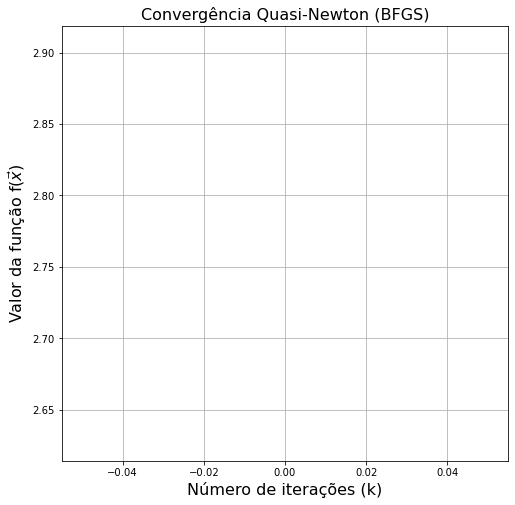

In [5]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [6]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  50
Tempo de Execução = 1.215660572052002 s
